### Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/medical_costs.csv', sep=',', header=0)

### Data transformation & Data analysis

#### Visualise the structure of the dataframe

In [2]:
print(df.head(10).to_string(line_width=1000))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


#### Describe the numerical contents of the dataframe

In [3]:
print(df.describe().to_string(line_width=1000))

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


#### Relevant analysis: relation between age and BMI

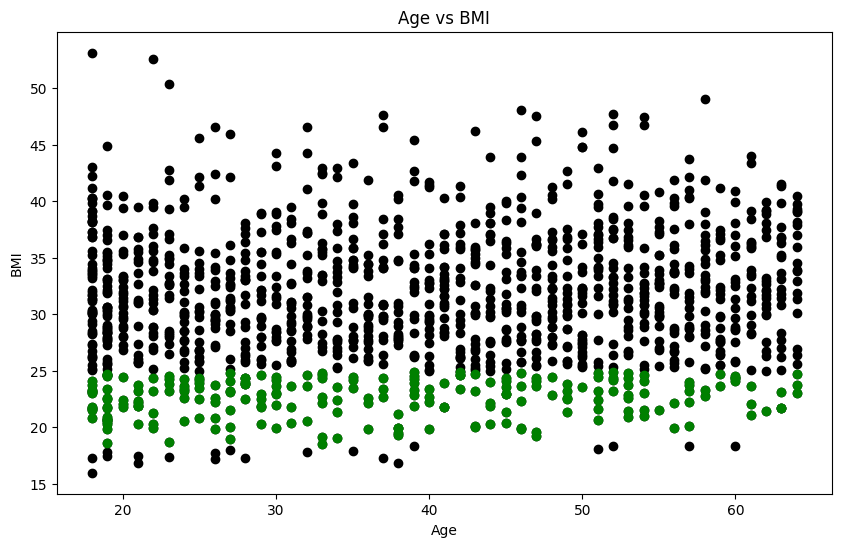

In [5]:
normal_bmi = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)]

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['bmi'], 'o', color='black')
plt.plot(normal_bmi['age'], normal_bmi['bmi'], 'o', color='green')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

#### Relevant analysis: age distribution in our dataset

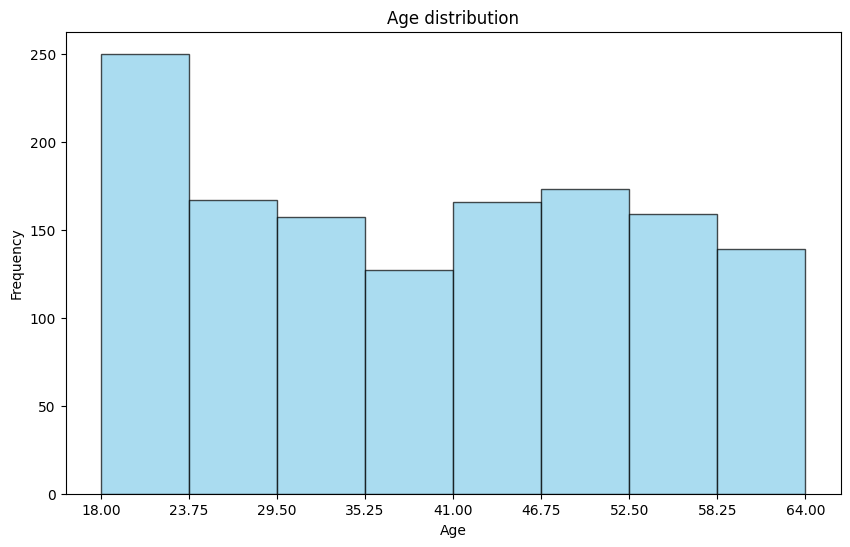

In [23]:
bin_nr = 8
counts, bin_edges = np.histogram(df['age'], bins=bin_nr)


plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=bin_nr, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks(bin_edges)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Relevant analysis: correlation heatmap between numerical values from the dataset

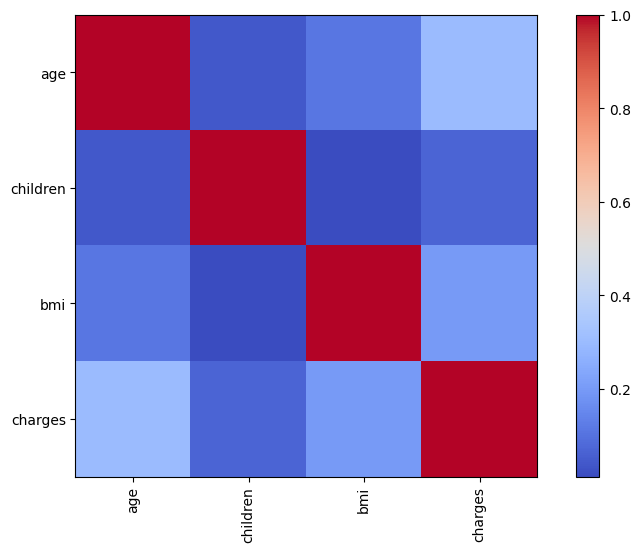

In [26]:
plt.figure(figsize=(10, 6))
correlation_data = df[['age', 'children', 'bmi', 'charges']]
correlation_matrix = correlation_data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

#### Relevant analysis: how is data pooled in each region

##### Total costs by Region

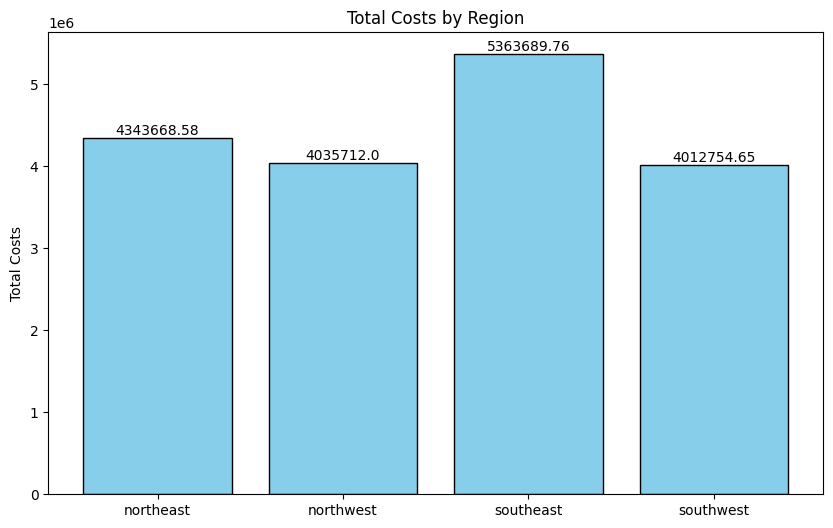

In [46]:
total_costs_by_region = df.groupby('region')['charges'].sum().reset_index()
# Total costs by Region
plt.figure(figsize=(10, 6))
bars = plt.bar(total_costs_by_region['region'], total_costs_by_region['charges'], color='skyblue', edgecolor='black')
plt.title('Total Costs by Region')
plt.ylabel('Total Costs')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

##### Average age by Region

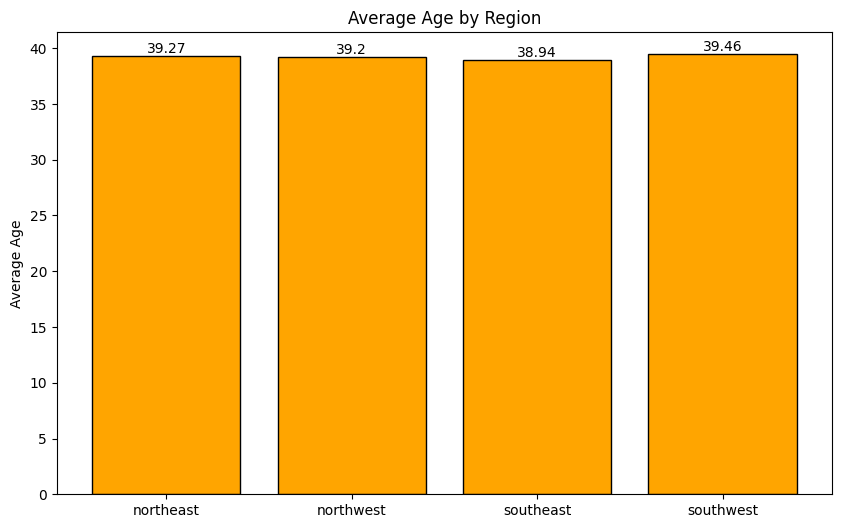

In [45]:
avg_age_by_region = df.groupby('region')['age'].mean().reset_index()
# Average age by Region
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_age_by_region['region'], avg_age_by_region['age'], color='orange', edgecolor='black')
plt.title('Average Age by Region')
plt.ylabel('Average Age')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

##### Average BMI by Region

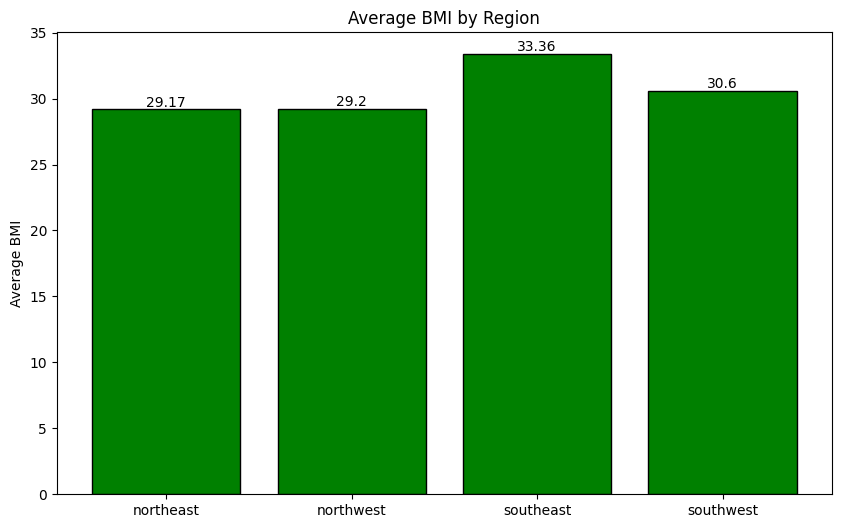

In [44]:
avg_bmi_by_region = df.groupby('region')['bmi'].mean().reset_index()
# Average BMI by Region
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_bmi_by_region['region'], avg_bmi_by_region['bmi'], color='green', edgecolor='black')
plt.title('Average BMI by Region')
plt.ylabel('Average BMI')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

##### Average number of children by Region

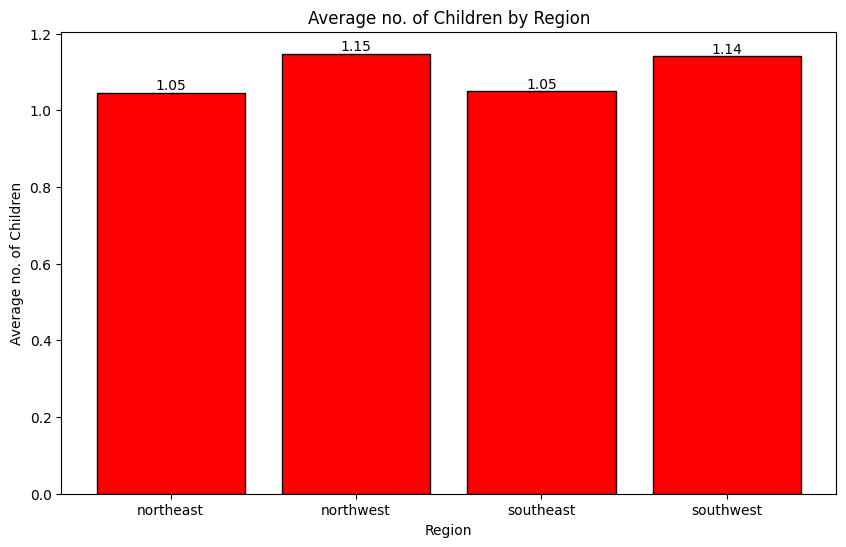

In [43]:
avg_children_by_region = df.groupby('region')['children'].mean().reset_index()
# Average Children by Region
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_children_by_region['region'], avg_children_by_region['children'], color='red', edgecolor='black')
plt.title('Average no. of Children by Region')
plt.ylabel('Average no. of Children')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

### Applying Clustering Algorithms

In [47]:
from sklearn.cluster import KMeans

#### Age and BMI clustering

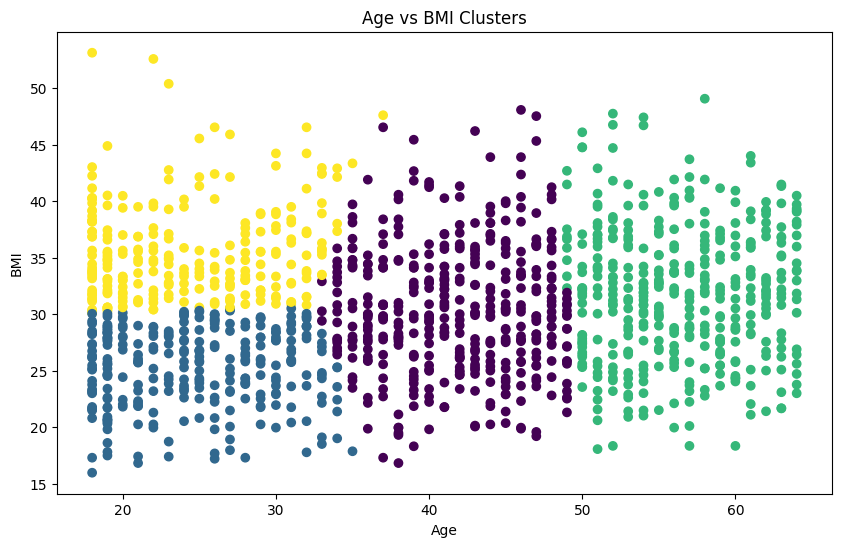

In [48]:
age_bmi = df.copy()
X = age_bmi[['age', 'bmi']]
k = 4 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
age_bmi['age_bmi_cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(age_bmi['age'], age_bmi['bmi'], c=age_bmi['age_bmi_cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI Clusters')
plt.show()

#### Age and Costs clustering

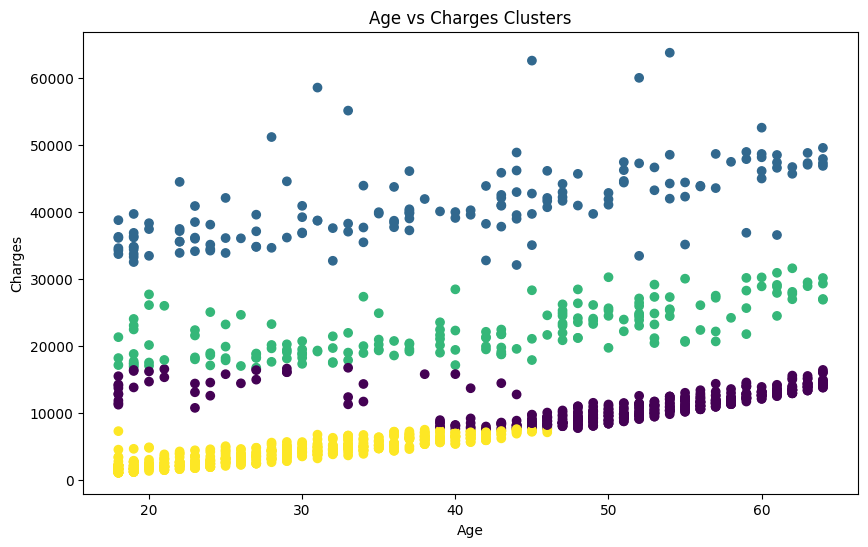

In [51]:
age_costs = df.copy()
X = age_costs[['age', 'charges']]
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
age_costs['age_charges_cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(age_costs['age'], age_costs['charges'], c=age_costs['age_charges_cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges Clusters')
plt.show()

#### Clustering Costs in each Region

C:\Users\astal\AppData\Local\Temp\ipykernel_15452\252060129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['cluster'] = kmeans.fit_predict(X)
C:\Users\astal\AppData\Local\Temp\ipykernel_15452\252060129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['cluster'] = kmeans.fit_predict(X)
C:\Users\astal\AppData\Local\Temp\ipykernel_15452\252060129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

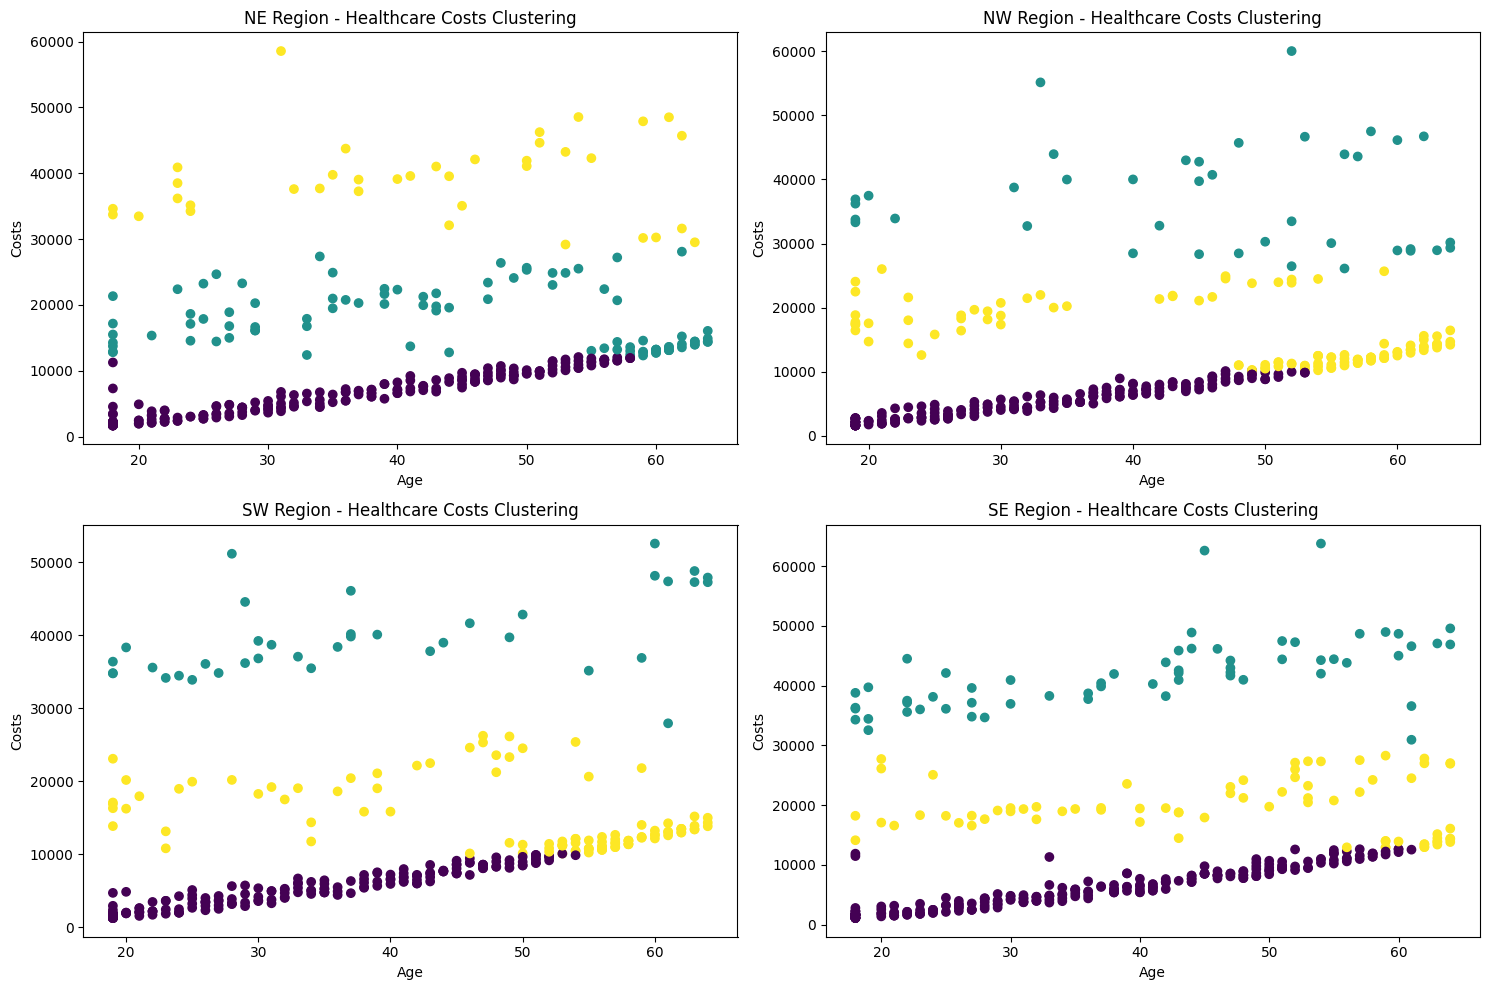

In [52]:
df_ne = df[df['region'] == 'northeast'] 
df_nw = df[df['region'] == 'northwest']
df_se = df[df['region'] == 'southeast']
df_sw = df[df['region'] == 'southwest']

def cluster_region(df_region):
    X = df_region[['age', 'bmi', 'charges']]
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_region['cluster'] = kmeans.fit_predict(X)
    return df_region

df_ne = cluster_region(df_ne)
df_nw = cluster_region(df_nw)
df_se = cluster_region(df_se)
df_sw = cluster_region(df_sw)

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.scatter(df_ne['age'], df_ne['charges'], c=df_ne['cluster'], cmap='viridis')
plt.title('NE Region - Healthcare Costs Clustering')
plt.xlabel('Age')
plt.ylabel('Costs')

plt.subplot(222)
plt.scatter(df_nw['age'], df_nw['charges'], c=df_nw['cluster'], cmap='viridis')
plt.title('NW Region - Healthcare Costs Clustering')
plt.xlabel('Age')
plt.ylabel('Costs')

plt.subplot(223)
plt.scatter(df_sw['age'], df_sw['charges'], c=df_sw['cluster'], cmap='viridis')
plt.title('SW Region - Healthcare Costs Clustering')
plt.xlabel('Age')
plt.ylabel('Costs')

plt.subplot(224)
plt.scatter(df_se['age'], df_se['charges'], c=df_se['cluster'], cmap='viridis')
plt.title('SE Region - Healthcare Costs Clustering')
plt.xlabel('Age')
plt.ylabel('Costs')

plt.tight_layout()
plt.show()

#### Lifestyle Cluster Analysis

C:\Users\astal\AppData\Local\Temp\ipykernel_15452\2551598612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'no': 0, 'yes': 1})


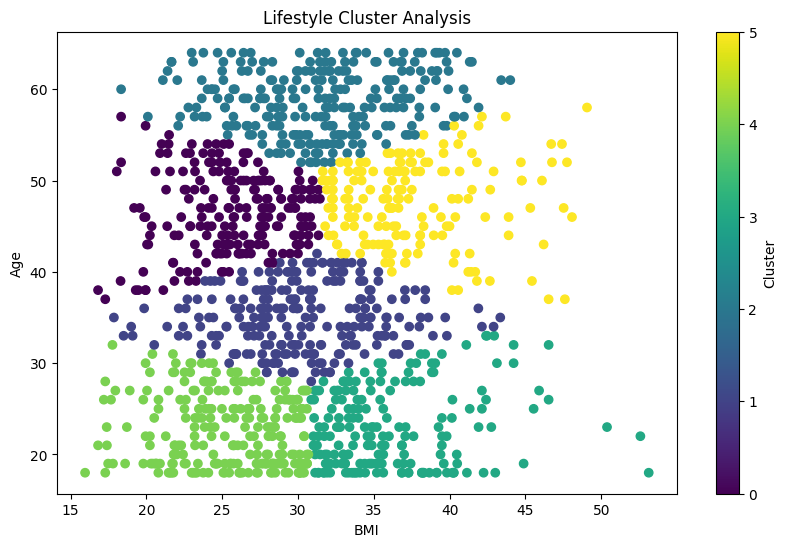

In [59]:
lifestyle_cluster = df.copy()

X = lifestyle_cluster[['bmi', 'smoker', 'age']]
X['smoker'] = X['smoker'].map({'no': 0, 'yes': 1})

kmeans = KMeans(n_clusters=6, random_state=42)
lifestyle_cluster['lifestyle_cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(lifestyle_cluster['bmi'], lifestyle_cluster['age'], c=lifestyle_cluster['lifestyle_cluster'], cmap='viridis')
plt.title('Lifestyle Cluster Analysis')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.colorbar(label='Cluster')
plt.show()